<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/ML_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Unlike classification tasks where the interest was to classify the data according to a discrete set of classes (categories), in regression we are interested to get a continous value out of our model. For instance, we might want to estimate the price of a house based on some features such as number of rooms, area of the house etc. Linear regression can be considered the simplest form of regression and it is given by the following function:

$y(x,w)=w_0 \cdot x_0+w_1\cdot x_1+w_2\cdot x_2+\dotsc+w_n\cdot x_n$

The key property of this model is that it is a linear function of the parameters $w_0,w_1, w_2, \dotsc, w_n$. It is also, however, a linear function of the input variables $x_i$, and this imposes significant limitations on the model. In the following tutorial we will investigate using a linear regressor of a single variable $x$ to predict the house prices using the well-known boston dataset. In fact, in these dataset many features are contributing to the house prices, but for simplicity we will choose one variable at time and investigate how the slope and the intercept are changining in order to minimise the cost.

Please refer to your lecture notes for more information on Linear regression.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [ ]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

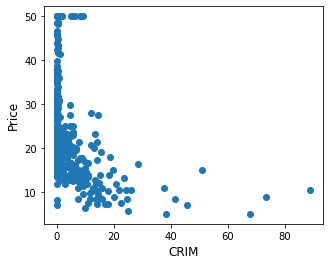

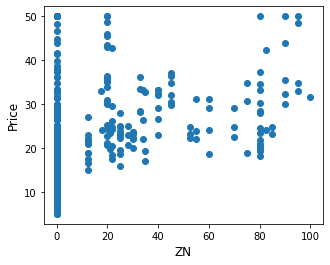

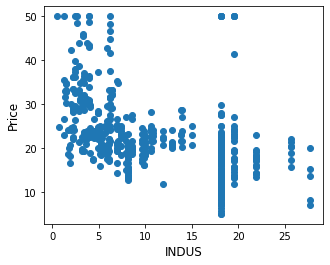

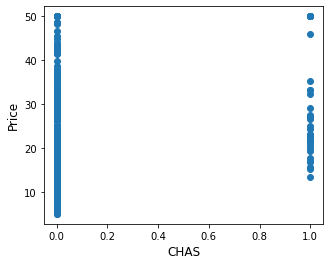

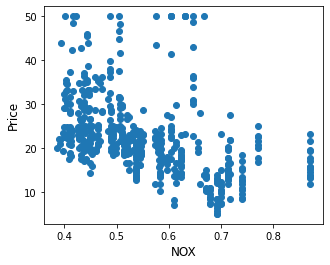

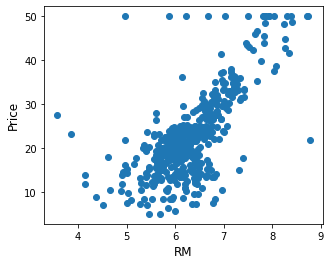

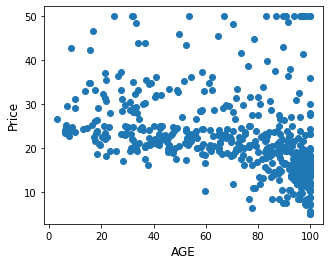

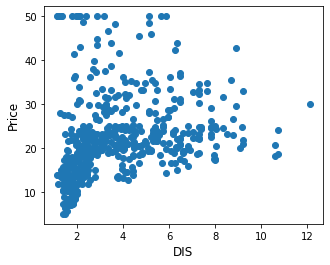

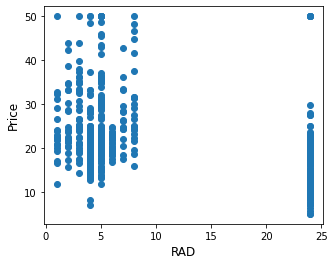

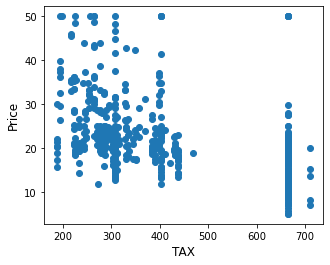

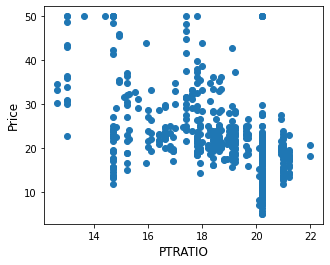

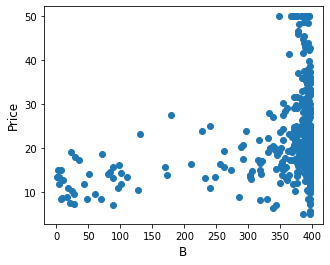

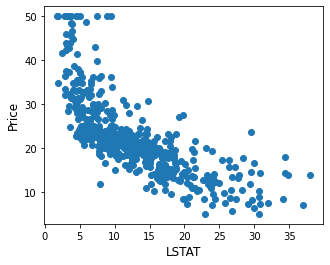

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()
    
boston_data = pd.DataFrame(data=boston['data'],columns=boston['feature_names'])
boston_data["MEDV"] = boston['target']
boston_data

In [ ]:
def predictPrice(X,W):
    return np.dot(X,W)

In [ ]:
def calculateCost(X,W,Y):
    prediction = predictPrice(X,W)
    return ((Y - prediction)**2).mean()/2

In [ ]:
def plot_line(X,W,Y):
    """Plot a line from slope and intercept"""
    y_vals = predictPrice(X,W)
    plt.xlabel('Number of Rooms in the house (RM)')
    plt.ylabel('Price of house (MEDV)')
    plt.scatter(X[:,1],Y, color='red', label='Actual')
    plt.plot(X[:,1], y_vals, color='black', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
def plot_cost(cost):
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

In [ ]:
def fit(n_iter,X,Y):
    W0 = []
    W1 = []
    costs = []
    N = len(boston['target'])
    W = np.zeros(2)
    for i in range(n_iter):
        pred = predictPrice(X,W)
        W[0] += (2/N) *(Y - pred).mean()
        W[1] += (2/N) *((Y - pred)* X[:,1]).mean()
        W = np.array([W[0],W[1]])
        J = calculateCost(X,W,Y)
        W0.append(W[0])
        W1.append(W[1])
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1}, Cost = {J}, Weights = {W}")
            plot_line(X,W,Y)
    plot_cost(costs)

Iteration: 1, Cost = 216.6983542187835, Weights = [0.08906248 0.57745065]


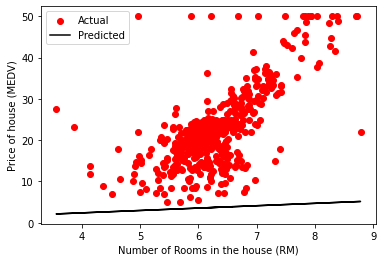

Iteration: 1001, Cost = 28.75263639621522, Weights = [-1.07656592  3.82095325]


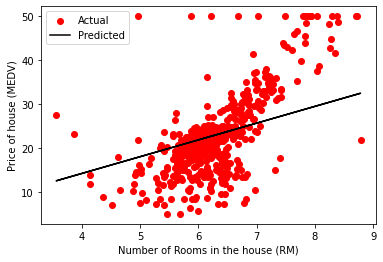

Iteration: 2001, Cost = 28.122244565209886, Weights = [-2.63578846  4.06607093]


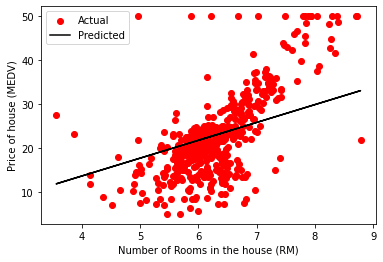

Iteration: 3001, Cost = 27.54901229317604, Weights = [-4.12264181  4.29981182]


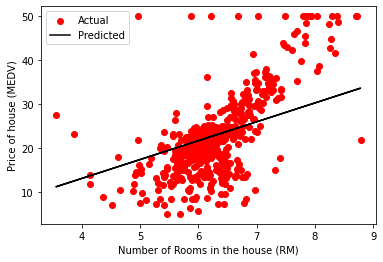

Iteration: 4001, Cost = 27.02775674775269, Weights = [-5.54048487  4.52270394]


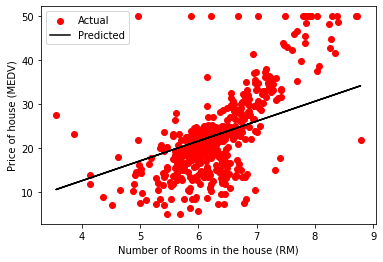

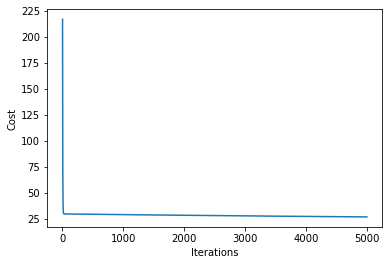

In [ ]:
n_iter=5000
x = boston_data["RM"]
X = np.column_stack((np.ones(len(x)),x))
Y = boston_data["MEDV"]
fit(n_iter,X,Y)

# Coursework:

## Task 1:

- Modify the code to predict the NOX concentration vs price of house (MEDV) and % lower status of the population (LSTAT) vs price of house (MEDV). Include in your report the weights and cost plot vs iteration for each linear gressor.

- Suggest ways to enhance the performance of the regressor and include that in your report.

## Task 2:

- Rewrite the code using Scikitlearn package for each regressor in the original tutorial and Task 1 (More information can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- Compare the weights and biases obtained using the code above with the Scikitlearn package outcomes for each regressor of the three. 
Hint: check the methods $.coef_$ and $.intercept_$ for obtaining the biase and intercept in Sciketlearn linear regressor.